In [119]:
import numpy as np
import matplotlib.pyplot as plt

## Polynomial Basises

### Monomial Basis

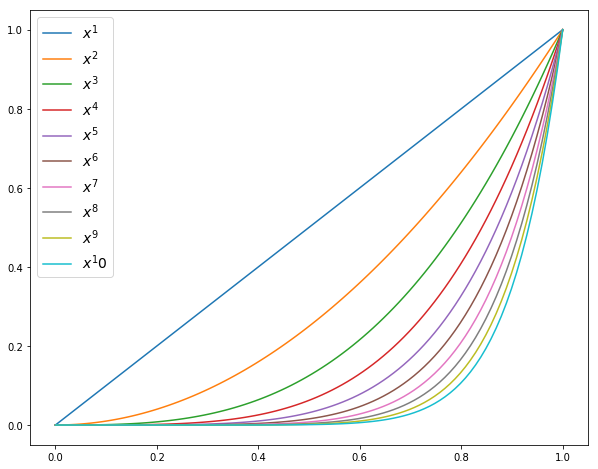

In [120]:
xn = np.linspace(0, 1, 100)
k = 10
plt.figure(figsize=(10, 8))
for i in range(1, k+1):
    yn = np.power(xn, i) # monomial basis
    plt.plot(xn , yn, label="$x^{}$".format(i))
plt.legend(fontsize=14)
plt.show()

### Lagrange Basis

In [121]:
def product(x, X, k):
    X1 = X.copy()
    k = k - 1
    X1.remove(X[k])
    prod = 1
    for xi in X1:
        prod = prod * (x-xi)
    return prod

In [122]:
def lagrange_basis(x, X, k):
    return product(x, X, k) / product(X[k-1], X, k)

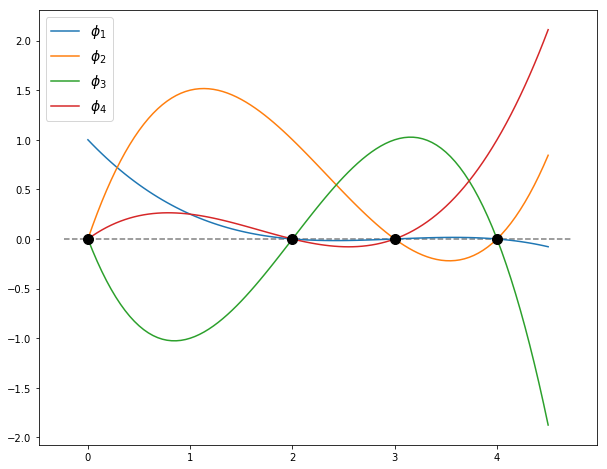

In [123]:
fixed_pts = [0, 2, 3, 4]
xn = np.linspace(0, 4.5, 100)

plt.figure(figsize=(10, 8))
for i in range(len(fixed_pts)):
    phin = lagrange_basis(xn, fixed_pts, i+1)
    plt.scatter(fixed_pts[i], 0, color='k', s=100, zorder=3)
    plt.plot(xn, phin, label="$\phi_{}$".format(i+1))
plt.hlines(0, plt.xlim()[0], plt.xlim()[1], color="gray", linestyle="--")
plt.legend(fontsize=14)
plt.show()

### Newton Basis

In [124]:
def newton_basis(x, X):
    psi_i = np.ones(len(x))
    psis = []
    for i in range(len(X)):
        psis.append(psi_i)
        psi_i = psi_i * (x - X[i]) 
        
    return psis

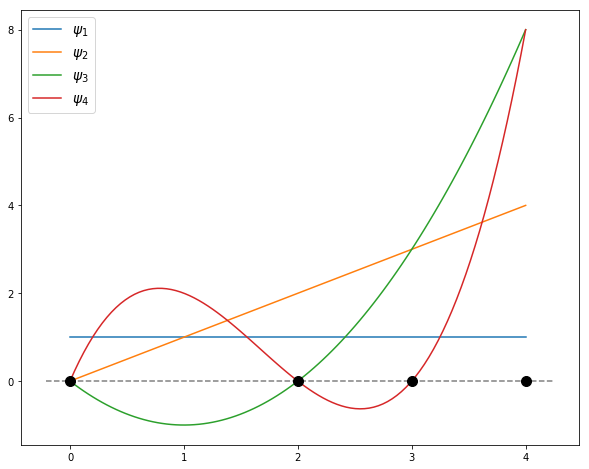

In [125]:
fixed_pts = [0, 2, 3, 4]
xn = np.linspace(0, 4, 100)
basises = newton_basis(xn, fixed_pts)

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.scatter(fixed_pts[i], 0, color='k', s=100, zorder=3)
    plt.plot(xn, basises[i], label=r"$\psi_{}$".format(i+1))
plt.hlines(0, plt.xlim()[0], plt.xlim()[1], color="gray", linestyle="--")
plt.legend(fontsize=14)    
plt.show()

## Interpolation

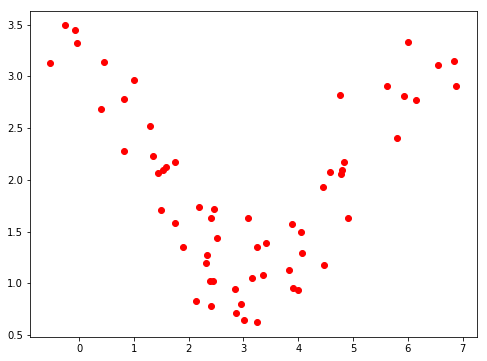

In [126]:
n = 60
np.random.seed(123)
x = np.random.uniform(-1, 7, n)
x.sort()
f = lambda x: np.cos(x) + 2
y = f(x) +  np.random.randn(n) * 0.3

plt.figure(figsize=(8, 6))
plt.plot(x, y, "ro")
plt.show()

### With Monomial

In [127]:
X_poly = np.c_[x**0, x**1, x**2, x**3, x**4]

In [128]:
Beta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
y_pred = X_poly @ Beta
error = np.sum((y - y_pred)**2) / len(y)
error

0.09742077043695525

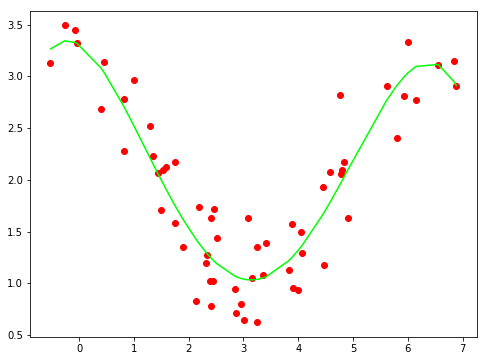

In [129]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, "ro")
plt.plot(x, y_pred, 'lime')
plt.show()

### With Lagrange Basis

In [138]:
fixed_pts = [0, 2, 3, 4, 6]
x1_lag = lagrange_basis(x, fixed_pts, 1)
x2_lag = lagrange_basis(x, fixed_pts, 2)
x3_lag = lagrange_basis(x, fixed_pts, 3)
x4_lag = lagrange_basis(x, fixed_pts, 4)
X_lag = np.c_[np.ones(len(x1_lag)), x1_lag,
              x2_lag, x3_lag, x4_lag]

In [139]:
Beta = np.linalg.inv(X_lag.T @ X_lag) @ X_lag.T @ y
y_pred = X_lag @ Beta
error = np.sum((y - y_pred)**2) / len(y)
error

0.09742077043695499

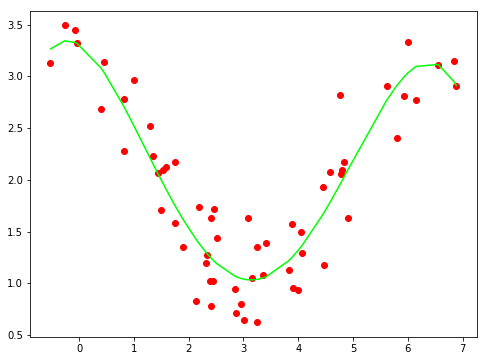

In [140]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, "ro")
plt.plot(x, y_pred, 'lime')
plt.show()

### With Newton Basis

In [133]:
fixed_pts = [0, 2, 3, 4, 6]
X_newton = newton_basis(x, fixed_pts)
X_newton = np.array(X_newton).T

In [134]:
Beta = np.linalg.inv(X_newton.T @ X_newton) @ X_newton.T @ y
y_pred = X_newton @ Beta
error = np.sum((y - y_pred)**2) / len(y)
error

0.09742077043695505

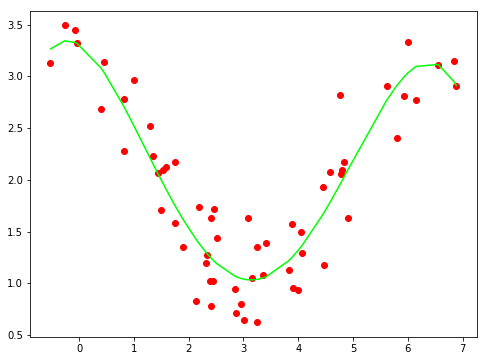

In [135]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, "ro")
plt.plot(x, y_pred, 'lime')
plt.show()